In [70]:
# http://scikit-learn.org/dev/auto_examples/neighbors/plot_lof.html
# ToDo: different metrics  
       
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

Automatically created module for IPython interactive environment


In [35]:
LocalOutlierFactor??

In [72]:
import pandas as pd
df = pd.read_csv("outlier_dataset.csv", sep=' ', header=None)
df.dtypes
df.head()

,0,1
0,0.412560,0.582276
1,0.379856,0.507856
2,0.379528,0.512318
3,0.642490,0.681989
4,0.462998,0.327923


In [73]:
X = df.as_matrix()
X[:, 1].max()

0.89379514557200002

In [9]:
np.cov??

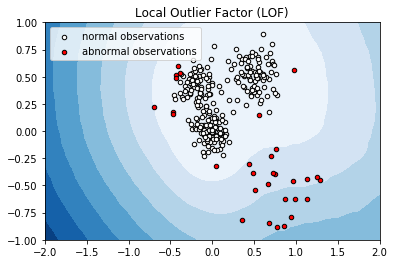

In [107]:
#         - from scikit-learn: ['cityblock', 'cosine', 'euclidean', 'l1', 'l2',
#           'manhattan']

#         - from scipy.spatial.distance: ['braycurtis', 'canberra', 'chebyshev',
#           'correlation', 'dice', 'hamming', 'jaccard', 'kulsinski',
#           'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
#           'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath',
#           'sqeuclidean', 'yule']

# metric='mahalanobis'
# Must provide either V or VI for Mahalanobis distance

# fit the model
# https://github.com/scikit-learn/scikit-learn/issues/6269
from sklearn.neighbors import DistanceMetric
# clf = LocalOutlierFactor(n_neighbors=15
#                          , 
#                                metric='mahalanobis', 
#                                metric_params={'V': np.cov(X[:,0], X[:,1], rowvar=False)}
#                         ) #25

clf = LocalOutlierFactor(n_neighbors=100, metric='euclidean') #25
y_pred = clf.fit_predict(X)
y_pred
X[:,0][0]
normal_0 = [X[:,0][i] for i in range(0, len(X[:,0])) if y_pred[i] == 1]
normal_1 = [X[:,1][i] for i in range(0, len(X[:,0])) if y_pred[i] == 1]
abnormal_0 = [X[:,0][i] for i in range(0, len(X[:,0])) if y_pred[i] == -1]
abnormal_1 = [X[:,1][i] for i in range(0, len(X[:,0])) if y_pred[i] == -1]

# plot the level sets of the decision function
plt.close('all')
xx, yy = np.meshgrid(np.linspace(-2, 2, 50), np.linspace(-1, 1, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(normal_0, normal_1, c='white',
                edgecolor='k', s=20)
b = plt.scatter(abnormal_0, abnormal_1, c='red',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-2, 2))
plt.ylim((-1, 1))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()

In [108]:
score = clf.negative_outlier_factor_
score

array([-1.05158162, -1.05425623, -1.04950498, -1.10919304, -1.09189064,
       -1.15178178, -1.0584165 , -1.09586049, -1.13040518, -1.05284543,
       -1.1329486 , -1.14248318, -1.10154766, -1.05607827, -1.10672191,
       -1.06951977, -1.1144574 , -1.12708679, -1.13149989, -1.08733505,
       -1.20793402, -1.09575092, -1.15341004, -1.08494665, -1.07727446,
       -1.10874339, -1.13601202, -1.03215523, -1.06111105, -1.16044933,
       -1.11454788, -1.085433  , -1.06349757, -1.09376327, -1.04047733,
       -1.06483603, -1.05232523, -1.08741039, -1.12798163, -1.09887329,
       -1.06230424, -1.09624545, -1.07802817, -1.03885852, -1.04242807,
       -1.09409977, -1.1056122 , -1.08909886, -1.08494986, -1.07489506,
       -1.11115219, -1.24497462, -1.08847759, -1.03473273, -1.07101556,
       -1.07383985, -1.09350185, -1.06309319, -1.05197166, -1.10736659,
       -1.11832194, -1.04551818, -0.97289089, -1.08551958, -1.06117211,
       -1.11651644, -1.09259057, -1.07804804, -1.09669874, -1.07

In [109]:
arr1inds = score.argsort()
# sorted_arr1 = arr1[arr1inds[::-1]]
# sorted_arr2 = arr2[arr1inds[::-1]]
# EDIT: changed to descending order

score_sorted = score[arr1inds]
X_sorted = X[arr1inds]

In [110]:
fraction = int(len(X) * 0.05)
fraction

15

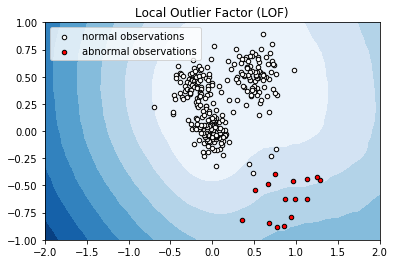

In [111]:
# plot the level sets of the decision function
plt.close('all')
xx, yy = np.meshgrid(np.linspace(-2, 2, 50), np.linspace(-1, 1, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X_sorted[0:fraction, 0], X_sorted[0:fraction, 1], c='red',
                edgecolor='k', s=20)
a = plt.scatter(X_sorted[fraction + 1:, 0], X_sorted[fraction + 1:, 1], c='white',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-2, 2))
plt.ylim((-1, 1))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()

In [112]:
score_sorted[:fraction]

array([-3.148364  , -3.14320872, -3.02224727, -3.00152062, -2.72091635,
       -2.69149972, -2.65514915, -2.64128333, -2.38141297, -2.31831602,
       -2.3051639 , -2.28214662, -2.24868655, -2.22565206, -2.12636499])

In [113]:
X_sorted[:fraction]

array([[ 0.85815107, -0.87322237],
       [ 0.7713365 , -0.88504456],
       [ 0.94238404, -0.78839055],
       [ 0.68049011, -0.84623353],
       [ 1.13612754, -0.62289061],
       [ 0.98921339, -0.62495808],
       [ 0.35589914, -0.81471485],
       [ 0.8670762 , -0.62577972],
       [ 1.29253098, -0.44760748],
       [ 1.2478639 , -0.42472419],
       [ 1.13452857, -0.44327916],
       [ 0.96842926, -0.45769769],
       [ 0.67216191, -0.48521872],
       [ 0.50684959, -0.53885901],
       [ 0.75513812, -0.39167682]])

In [129]:
LocalOutlierFactor??